<a href="https://colab.research.google.com/github/LuvMutreja/Cardiovascular-Risk-Prediction/blob/main/Classification_Capstone_Project_Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Cardiovascular Risk Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual - Luv Mutreja


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). The dataset provides the patients' information. It includes
over 4,000 records and 15 attributes. Each attribute is a potential risk factor. There are both
demographic, behavioral, and medical risk factors.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.rcParams['figure.figsize'] = (10,6)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.under_sampling import TomekLinks
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, precision_score, recall_score

### Dataset Loading

In [ ]:
# Loading the Dataset
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Importing the dataset
dataset = pd.read_csv('G:\My Drive\Alma Better\Module 4 Machine Learning\#Capstone Projects\Classification Capstone Project- Cardiovascular Risk Prediction\data_cardiovascular_risk.csv')

### Dataset First View

In [ ]:
# Dataset First Look
dataset.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
dataset.shape

(3390, 17)

### Dataset Information

In [ ]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(dataset[dataset.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(dataset.isnull().sum())

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64


In [ ]:
# printing the total null values in the dataset
print('Total null values present in this dataset are :',dataset.isnull().sum().sum())

Total null values present in this dataset are : 510


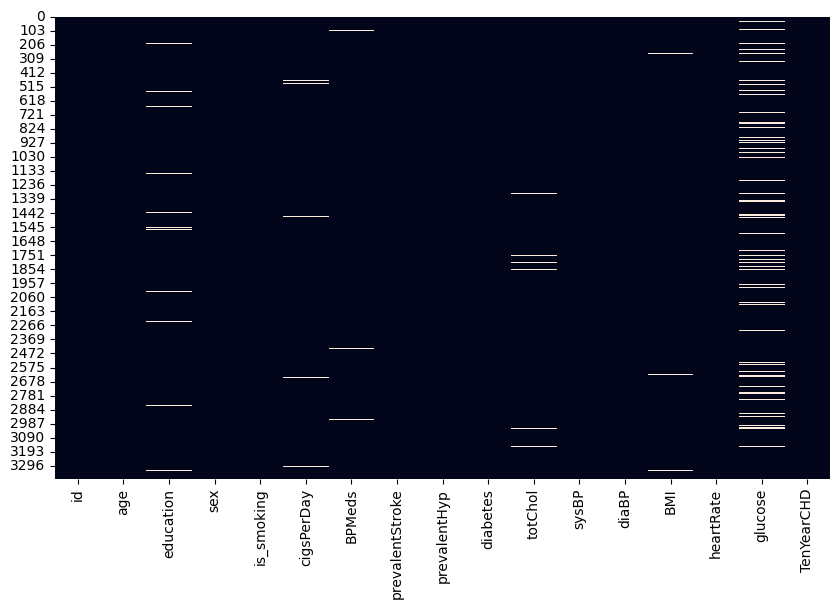

In [ ]:
# visualizing Null Value by plotting Heatmap
sns.heatmap(dataset.isnull(), cbar=False)
plt.show()

### What did you know about your dataset?

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The aim is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset contains ['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'] i.e 17 columns for 3390 rows. Few columns have null values but glucose column has the highest null values i.e 304. Total null values in this dataset are 510.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
dataset.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
# Dataset Describe
dataset.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


### Variables Description 

<b>Unique Identifier:</b>
*  ID: Id of the person 

<b>Demographic:</b>
*  Sex: male or female("M" or "F")
*  Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

<b>Education:</b>
* Education: Educational qualification of the person.(Discrete)

<b>Behavioral:</b>
*  is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
*   Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(Discrete)

<b>Medical( history):</b>
*   BP Meds: whether or not the patient was on blood pressure medication (binary: “1”, means “Yes”, “0” means “No”)
*   Prevalent Stroke: whether or not the patient had previously had a stroke (binary: “1”, means “Yes”, “0” means “No”)
*   Prevalent Hyp: whether or not the patient was hypertensive i.e has high BP problem.(binary: “1”, means “Yes”, “0” means “No”)
*   Diabetes: whether or not the patient had diabetes (binary: “1”, means “Yes”, “0” means “No”)

<b>Medical( current):</b>
*   Tot Chol: total cholesterol level (Continuous)
*   Sys BP: systolic blood pressure (Continuous)
*   Dia BP: diastolic blood pressure (Continuous)
*   BMI: Body Mass Index (Continuous)
*   Heart Rate: heart rate (Continuous)
*   Glucose: glucose level (Continuous)

<b>Predict or target variable:</b>
*   10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
Dependent Variable

### Check Unique Values for each variable.

In [ ]:
# Checking Unique Values for each variable.
for col in dataset.columns:
  print('Number of unique values in ',col,' is ',dataset[col].nunique())

Number of unique values in  id  is  3390
Number of unique values in  age  is  39
Number of unique values in  education  is  4
Number of unique values in  sex  is  2
Number of unique values in  is_smoking  is  2
Number of unique values in  cigsPerDay  is  32
Number of unique values in  BPMeds  is  2
Number of unique values in  prevalentStroke  is  2
Number of unique values in  prevalentHyp  is  2
Number of unique values in  diabetes  is  2
Number of unique values in  totChol  is  240
Number of unique values in  sysBP  is  226
Number of unique values in  diaBP  is  142
Number of unique values in  BMI  is  1259
Number of unique values in  heartRate  is  68
Number of unique values in  glucose  is  132
Number of unique values in  TenYearCHD  is  2


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
categorical= [col for col in dataset.columns[1:-1] if dataset[col].dtype=='O']
print('There are',len(categorical),'categorical features in the dataset i.e:',categorical)

There are 2 categorical features in the dataset i.e: ['sex', 'is_smoking']


In [ ]:
numerical=[col for col in dataset.columns[1:-1] if dataset[col].dtype!='O']
print('There are',len(numerical),'numerical features in the dataset i.e:',numerical)

There are 13 numerical features in the dataset i.e: ['age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


In [ ]:
discrete=[col for col in numerical if dataset[col].nunique()<35]
print('There are',len(discrete),'discrete features in the dataset i.e:',discrete)

There are 6 discrete features in the dataset i.e: ['education', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']


In [ ]:
continuous= [col for col in numerical if col not in discrete]
print('There are',len(continuous),'continuous features in the dataset i.e:',continuous)

There are 7 continuous features in the dataset i.e: ['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


In [ ]:
# viewing the target variable
dataset['TenYearCHD'].value_counts()

TenYearCHD
0    2879
1     511
Name: count, dtype: int64

In [ ]:
# viewing the imbalance in the target variable
len(dataset[dataset['TenYearCHD']==0])/len(dataset[dataset['TenYearCHD']==1])

5.634050880626223

In [ ]:
# viewing the number of people who might have chd in future 
print("Number of people who have a future 10-year risk of coronary heart disease is", len(dataset[dataset['TenYearCHD']==1]))

Number of people who have a future 10-year risk of coronary heart disease is 511


In [ ]:
dataset['is_smoking'].value_counts()

is_smoking
NO     1703
YES    1687
Name: count, dtype: int64

In [ ]:
pd.DataFrame(dataset.groupby('is_smoking')['TenYearCHD'].value_counts())

count
is_smoking TenYearCHD       
NO         0            1467
           1             236
YES        0            1412
           1             275

In [ ]:
pd.DataFrame(dataset.groupby('is_smoking')['TenYearCHD'].value_counts().reset_index(name='count'))

,is_smoking,TenYearCHD,count
0,NO,0,1467
1,NO,1,236
2,YES,0,1412
3,YES,1,275


In [ ]:
dataset['sex'].value_counts()

sex
F    1923
M    1467
Name: count, dtype: int64

In [ ]:
pd.DataFrame(dataset.groupby('sex')['is_smoking'].value_counts())

count
sex is_smoking       
F   NO           1147
    YES           776
M   YES           911
    NO            556

In [ ]:
pd.DataFrame(dataset.groupby('is_smoking')['cigsPerDay'].value_counts())

count
is_smoking cigsPerDay       
NO         0.0          1703
YES        20.0          606
           30.0          176
           15.0          172
           10.0          106
           9.0           104
           5.0           103
           3.0            79
           40.0           62
           1.0            48
           25.0           44
           43.0           42
           35.0           17
           2.0            17
           6.0            14
           8.0            10
           60.0            8
           7.0             8
           4.0             7
           18.0            7
           50.0            6
           23.0            5
           17.0            5
           11.0            4
           12.0            3
           13.0            3
           45.0            2
           16.0            2
           19.0            2
           38.0            1
           14.0            1
           70.0            1

In [ ]:
pd.DataFrame(dataset.groupby('sex')['TenYearCHD'].value_counts())

count
sex TenYearCHD       
F   0            1684
    1             239
M   0            1195
    1             272

In [ ]:
pd.DataFrame(dataset.groupby('BPMeds')['TenYearCHD'].value_counts())

count
BPMeds TenYearCHD       
0.0    0            2775
       1             471
1.0    0              67
       1              33

In [ ]:
pd.DataFrame(dataset.groupby('prevalentStroke')['TenYearCHD'].value_counts())

count
prevalentStroke TenYearCHD       
0               0            2867
                1             501
1               0              12
                1              10

In [ ]:
pd.DataFrame(dataset.groupby('prevalentHyp')['TenYearCHD'].value_counts())

count
prevalentHyp TenYearCHD       
0            0            2065
             1             256
1            0             814
             1             255

In [ ]:
pd.DataFrame(dataset.groupby('diabetes')['TenYearCHD'].value_counts())

count
diabetes TenYearCHD       
0        0            2825
         1             478
1        0              54
         1              33

In [ ]:
pd.DataFrame(dataset.groupby('BPMeds')[['diabetes','TenYearCHD']].value_counts())

count
BPMeds diabetes TenYearCHD       
0.0    0        0            2724
                1             445
       1        0              51
                1              26
1.0    0        0              64
                1              27
       1        1               6
                0               3

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code
# px.box(dataset[['totChol','sysBP','diaBP','BMI','heartRate','glucose']],points='all')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Missing Value Count Function
def show_missing():
    missing=dataset.columns[dataset.isnull().any()].tolist()
    return missing

In [ ]:
# Missing data counts and percentage
print('Missing Data Count')
print(dataset[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(dataset[show_missing()].isnull().sum().sort_values(ascending = False)/len(dataset)*100,2))

Missing Data Count
glucose       304
education      87
BPMeds         44
totChol        38
cigsPerDay     22
BMI            14
heartRate       1
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
glucose       8.97
education     2.57
BPMeds        1.30
totChol       1.12
cigsPerDay    0.65
BMI           0.41
heartRate     0.03
dtype: float64


In [ ]:
dataset[dataset.columns[dataset.isnull().any()].tolist()].nunique()

education        4
cigsPerDay      32
BPMeds           2
totChol        240
BMI           1259
heartRate       68
glucose        132
dtype: int64

In [ ]:
dataset[dataset['is_smoking']=='NO']['cigsPerDay'].isnull().sum()

0

In [ ]:
#  
dataset[dataset['is_smoking']=='YES']['cigsPerDay'].isnull().sum()

22

In [ ]:
int(round(dataset[dataset['is_smoking']=='YES']['cigsPerDay'].mean(),0))

18

In [ ]:
dataset['cigsPerDay'].fillna(int(round(dataset[dataset['is_smoking']=='YES']['cigsPerDay'].mean(),0)),inplace=True)

In [ ]:
dataset['cigsPerDay'].isnull().sum()

0

In [ ]:
dataset[dataset['BPMeds'].isnull()][['BPMeds','TenYearCHD']]

,BPMeds,TenYearCHD
8,NaN,0
102,NaN,0
128,NaN,0
174,NaN,0
194,NaN,0
265,NaN,0
304,NaN,0
656,NaN,0
863,NaN,0
864,NaN,0


In [ ]:
BPmeds_dict= {0:0}
dataset['BPMeds'].fillna(dataset['TenYearCHD'].map(BPmeds_dict),inplace=True)

In [ ]:
dataset[dataset['BPMeds'].isnull()]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1288,1288,45,3.0,M,YES,40.0,NaN,0,0,0,278.0,135.0,84.0,23.79,75.0,79.0,1
1367,1367,66,1.0,F,NO,0.0,NaN,0,1,1,203.0,205.0,83.0,28.27,75.0,118.0,1
1769,1769,57,4.0,F,NO,0.0,NaN,0,1,0,328.0,181.0,112.5,27.05,85.0,94.0,1
1862,1862,65,1.0,F,NO,0.0,NaN,1,1,0,290.0,144.0,64.0,21.41,58.0,145.0,1
2644,2644,65,2.0,F,NO,0.0,NaN,0,1,0,270.0,165.0,98.0,21.66,62.0,92.0,1
2940,2940,50,4.0,M,YES,9.0,NaN,0,0,0,296.0,119.0,90.0,23.55,75.0,69.0,1
3013,3013,55,1.0,F,NO,0.0,NaN,0,1,0,325.0,155.0,90.0,26.27,68.0,72.0,1


In [ ]:
BPmeds_dict1= {1288:0,1367:1,1769:0,1862:1,2644:0,2940:0,3013:0}
dataset['BPMeds'].fillna(dataset['id'].map(BPmeds_dict1),inplace=True)

In [ ]:
for col in dataset.columns[dataset.isnull().any()].tolist():
    print(col,':',dataset[col].isnull().sum())

education : 87
totChol : 38
BMI : 14
heartRate : 1
glucose : 304


In [ ]:
dataset['education'].mode()[0]

1.0

In [ ]:
dataset['education'].fillna(dataset['education'].mode()[0],inplace=True)

In [ ]:
for col in dataset.columns[dataset.isnull().any()].tolist():
    print(col,':',dataset[col].isnull().sum())

totChol : 38
BMI : 14
heartRate : 1
glucose : 304


In [ ]:
dataset[dataset.columns[dataset.isnull().any()].tolist()].nunique()

totChol       240
BMI          1259
heartRate      68
glucose       132
dtype: int64

In [ ]:
for col in dataset.columns[dataset.isnull().any()].tolist():
    dataset[col].fillna(dataset[col].median(),inplace=True)
    print(col,'is now free of null values.')

totChol is now free of null values.
BMI is now free of null values.
heartRate is now free of null values.
glucose is now free of null values.


In [ ]:
dataset.isnull().sum().sum()

0

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
dataset[continuous].describe()

,age,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,3390.000000,3390.000000,3390.00000,3390.000000,3390.000000,3390.000000,3390.000000
mean,49.542183,237.039823,132.60118,82.883038,25.793251,75.976991,81.720059
std,8.592878,44.994205,22.29203,12.023581,4.107026,11.970114,23.161265
min,32.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000
25%,42.000000,206.000000,117.00000,74.500000,23.030000,68.000000,72.000000
50%,49.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000
75%,56.000000,264.000000,144.00000,90.000000,27.997500,83.000000,85.000000
max,70.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000


In [ ]:
# px.box(dataset[continuous])

C:\Users\Luv\AppData\Local\Temp\ipykernel_18664\731261572.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col])


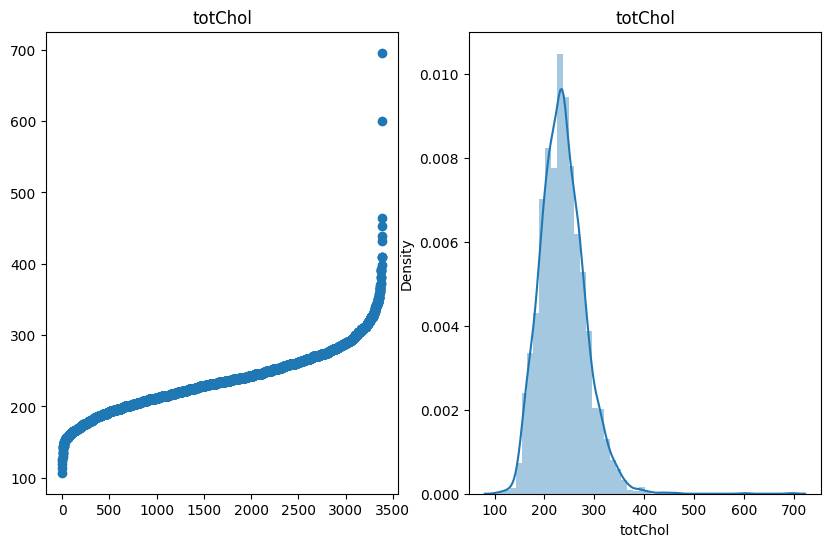

C:\Users\Luv\AppData\Local\Temp\ipykernel_18664\731261572.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col])


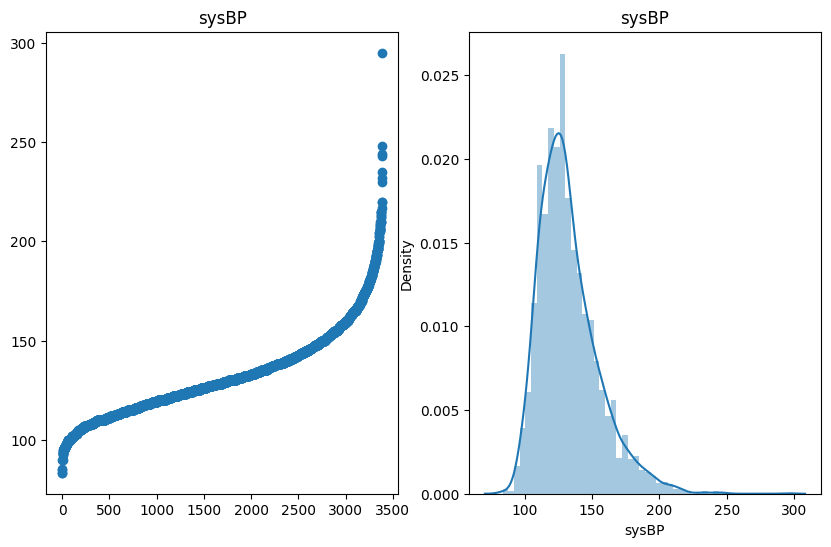

C:\Users\Luv\AppData\Local\Temp\ipykernel_18664\731261572.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col])


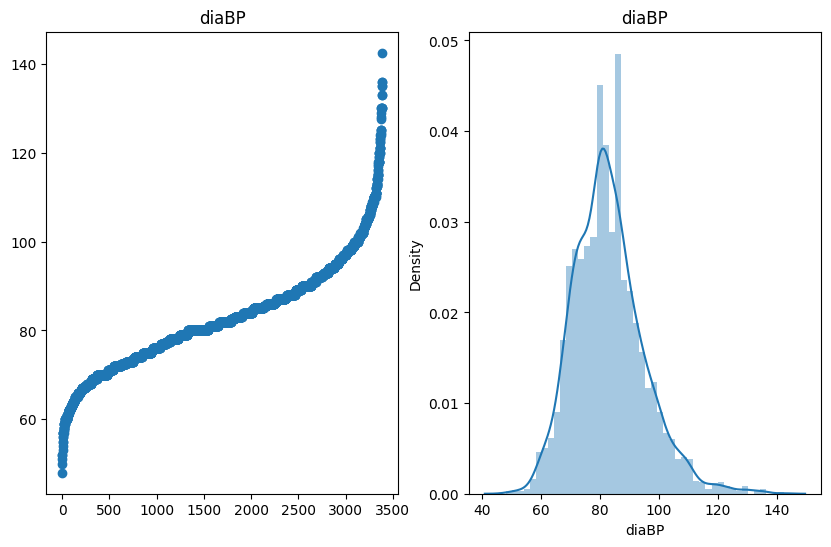

C:\Users\Luv\AppData\Local\Temp\ipykernel_18664\731261572.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col])


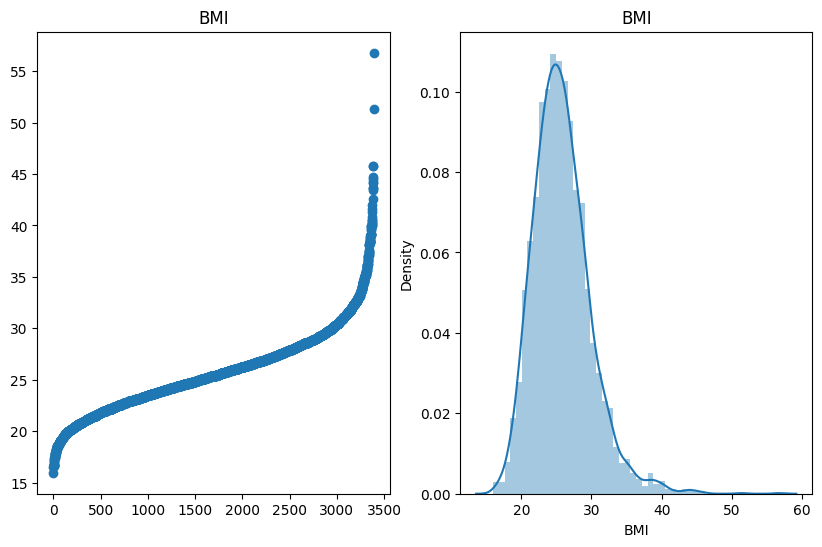

C:\Users\Luv\AppData\Local\Temp\ipykernel_18664\731261572.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col])


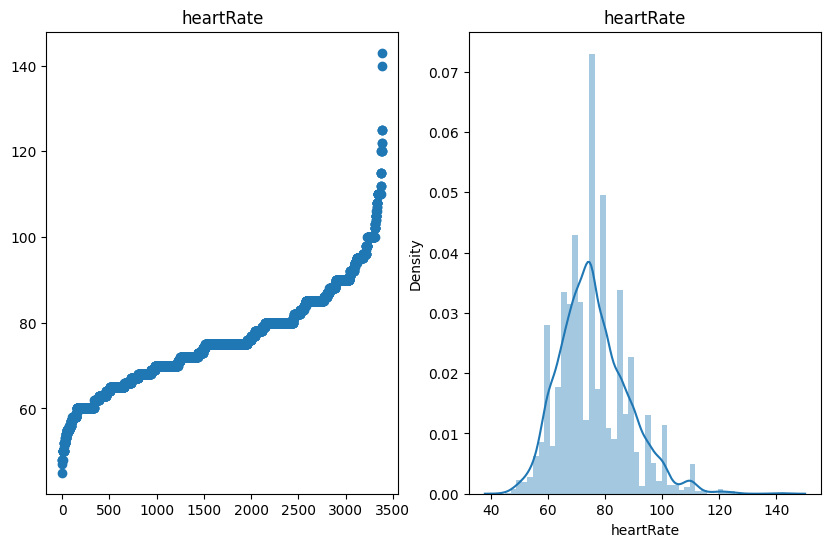

C:\Users\Luv\AppData\Local\Temp\ipykernel_18664\731261572.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col])


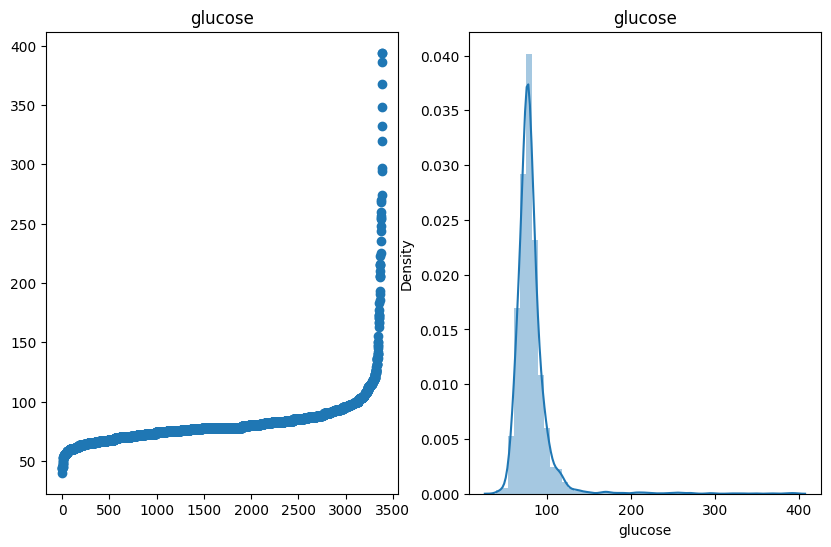

In [ ]:
for col in ['totChol','sysBP','diaBP','BMI','heartRate','glucose']:
    plt.subplot(1,2,1)
    plt.scatter(range(dataset.shape[0]),np.sort(dataset[col].values))
    plt.title(col)
    
    plt.subplot(1,2,2)
    sns.distplot(dataset[col])
    plt.title(col)
    plt.show()    

In [ ]:
outliers=0
outlier_columns=[]
for col in continuous[1:]:
    q1=dataset[col].quantile(0.25)
    q3=dataset[col].quantile(0.75)
    iqr=q3-q1
    upper_limit=q3+(1.5*iqr)
    lower_limit=q1-(1.5*iqr)
    percentage_outliers= round(((len(dataset[dataset[col]>upper_limit])+len(dataset[dataset[col]<lower_limit]))/len(dataset))*100,2) 
    print(col,'has',len(dataset[dataset[col]>upper_limit]),'values above the upper limit and',len(dataset[dataset[col]<lower_limit]),'values below the lower limit. There are',percentage_outliers,'percent outliers in this feature.')
    outliers=outliers+(len(dataset[dataset[col]>upper_limit])+len(dataset[dataset[col]<lower_limit]))
    column=col+'_outlier'
    outlier_columns.append(column)
    dataset[column]=np.where(dataset[col]>upper_limit,1,np.where(dataset[col]<lower_limit,1,0))    
print(outliers)

totChol has 41 values above the upper limit and 2 values below the lower limit. There are 1.27 percent outliers in this feature.
sysBP has 105 values above the upper limit and 0 values below the lower limit. There are 3.1 percent outliers in this feature.
diaBP has 55 values above the upper limit and 3 values below the lower limit. There are 1.71 percent outliers in this feature.
BMI has 79 values above the upper limit and 0 values below the lower limit. There are 2.33 percent outliers in this feature.
heartRate has 63 values above the upper limit and 1 values below the lower limit. There are 1.89 percent outliers in this feature.
glucose has 200 values above the upper limit and 14 values below the lower limit. There are 6.31 percent outliers in this feature.
563


In [ ]:
dataset['outlier']=np.where((dataset['totChol_outlier']==1)|(dataset['sysBP_outlier']==1)|(dataset['diaBP_outlier']==1)|(dataset['BMI_outlier']==1)|(dataset['heartRate_outlier']==1)|(dataset['glucose_outlier']==1),1,0)

In [ ]:
dataset[(dataset['totChol_outlier']==1)|(dataset['sysBP_outlier']==1)|(dataset['diaBP_outlier']==1)|(dataset['BMI_outlier']==1)|(dataset['heartRate_outlier']==1)|(dataset['glucose_outlier']==1)][['TenYearCHD','outlier']].sort_values(by='outlier',ascending=True)

,TenYearCHD,outlier
5,1,1
2319,0,1
2315,1,1
2303,0,1
2296,0,1
...,...,...
1123,0,1
1119,0,1
1116,0,1
1105,0,1


In [ ]:
dataset.drop(columns=outlier_columns,inplace=True)

In [ ]:
dataset[(dataset['outlier']==1)&(dataset['TenYearCHD']==0)]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,outlier
6,6,61,1.0,M,NO,0.0,0.0,0,1,0,238.0,232.0,136.0,24.83,75.0,79.0,0,1
10,10,61,1.0,F,NO,0.0,0.0,0,1,0,234.0,185.0,121.0,35.22,80.0,78.0,0,1
14,14,58,3.0,F,NO,0.0,0.0,0,1,0,188.0,160.0,120.0,35.58,88.0,85.0,0,1
37,37,63,2.0,F,NO,0.0,0.0,0,1,0,293.0,186.5,97.0,30.47,60.0,96.0,0,1
59,59,60,3.0,F,NO,0.0,0.0,0,1,0,275.0,141.0,84.0,29.66,75.0,105.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3326,3326,42,1.0,M,YES,20.0,0.0,0,0,0,410.0,116.0,83.0,21.68,90.0,83.0,0,1
3342,3342,39,1.0,F,NO,0.0,0.0,0,0,0,214.0,123.0,78.0,38.06,66.0,62.0,0,1
3365,3365,55,1.0,F,NO,0.0,0.0,0,0,0,310.0,135.0,76.5,26.31,110.0,74.0,0,1
3367,3367,59,3.0,M,YES,20.0,0.0,0,1,0,206.0,187.0,97.0,26.00,100.0,69.0,0,1


In [ ]:
dataset.drop(dataset[(dataset['outlier']==1)&(dataset['TenYearCHD']==0)].index,inplace=True)

In [ ]:
dataset['TenYearCHD'].value_counts()

TenYearCHD
0    2539
1     511
Name: count, dtype: int64

In [ ]:
dataset

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,outlier
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1,0
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,0
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1,1
3388,3388,60,1.0,M,NO,0.0,0.0,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0,0


In [ ]:
dataset[dataset['outlier']==1]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,outlier
5,5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1,1
15,15,51,1.0,M,YES,15.0,0.0,0,0,0,212.0,146.0,89.0,24.49,100.0,132.0,1,1
20,20,42,1.0,F,YES,20.0,0.0,0,1,0,199.0,141.0,92.0,43.69,80.0,60.0,1,1
81,81,41,4.0,M,YES,40.0,0.0,0,0,0,254.0,141.0,100.0,27.68,110.0,78.0,1,1
151,151,52,3.0,M,YES,20.0,0.0,0,0,0,265.0,106.0,79.0,26.48,80.0,163.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3260,3260,43,1.0,F,NO,0.0,0.0,0,1,1,231.0,155.5,99.5,34.95,68.0,274.0,1,1
3296,3296,57,1.0,F,YES,43.0,0.0,0,1,0,283.0,207.5,118.0,38.61,100.0,83.0,1,1
3308,3308,60,1.0,F,NO,0.0,0.0,0,1,0,352.0,197.5,105.0,36.29,75.0,95.0,1,1
3373,3373,58,1.0,F,NO,0.0,0.0,0,0,1,260.0,85.5,51.0,20.76,87.0,206.0,1,1


In [ ]:
# px.box(dataset[continuous])

C:\Users\Luv\AppData\Local\Temp\ipykernel_18664\4079468169.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col])


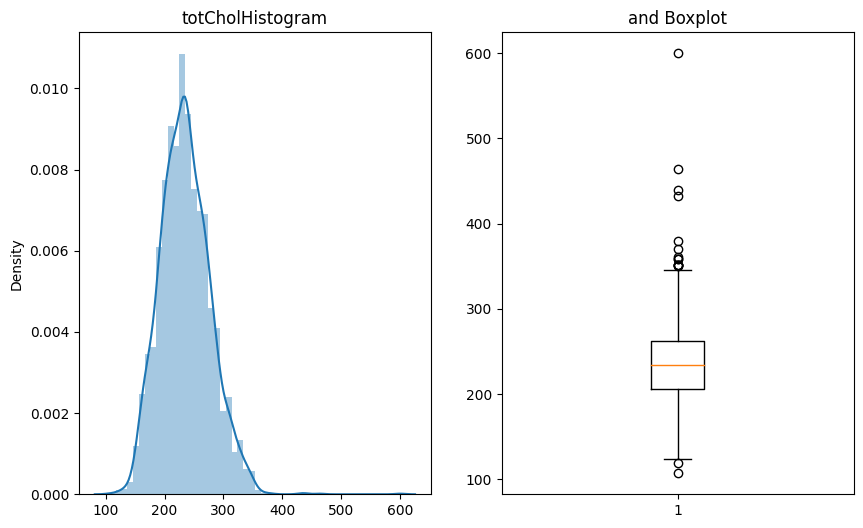

C:\Users\Luv\AppData\Local\Temp\ipykernel_18664\4079468169.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col])


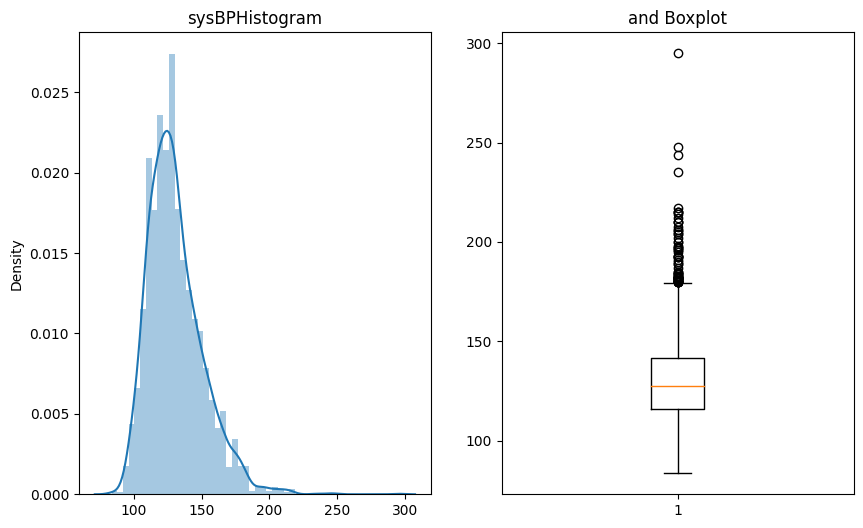

C:\Users\Luv\AppData\Local\Temp\ipykernel_18664\4079468169.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col])


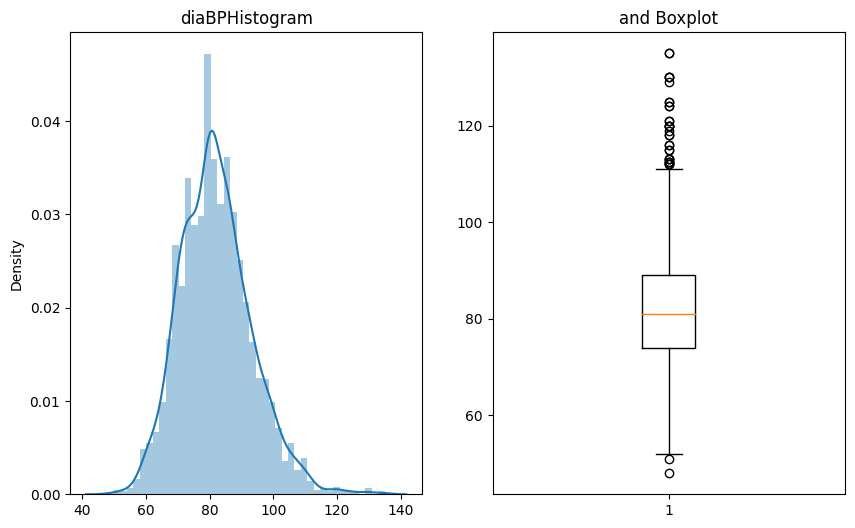

C:\Users\Luv\AppData\Local\Temp\ipykernel_18664\4079468169.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col])


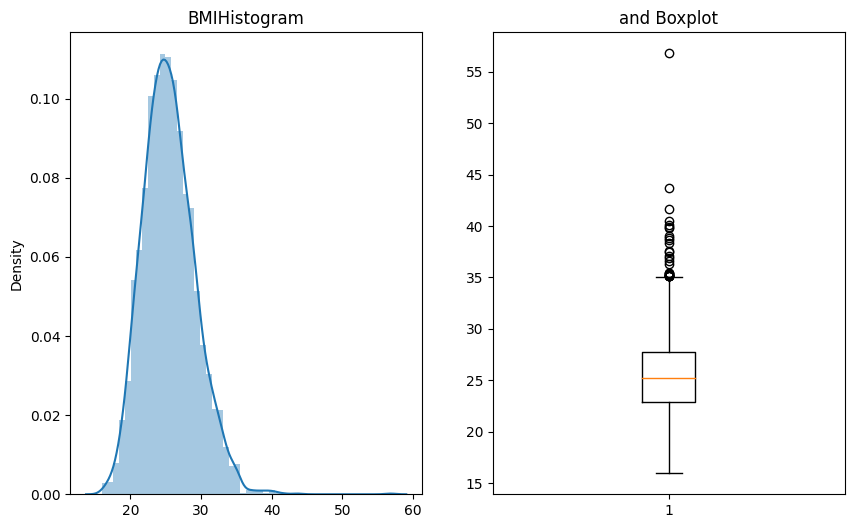

C:\Users\Luv\AppData\Local\Temp\ipykernel_18664\4079468169.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col])


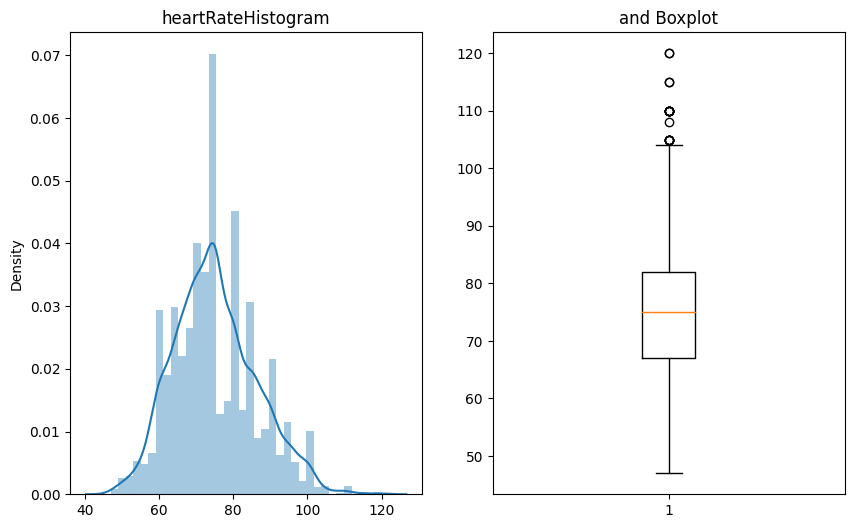

C:\Users\Luv\AppData\Local\Temp\ipykernel_18664\4079468169.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col])


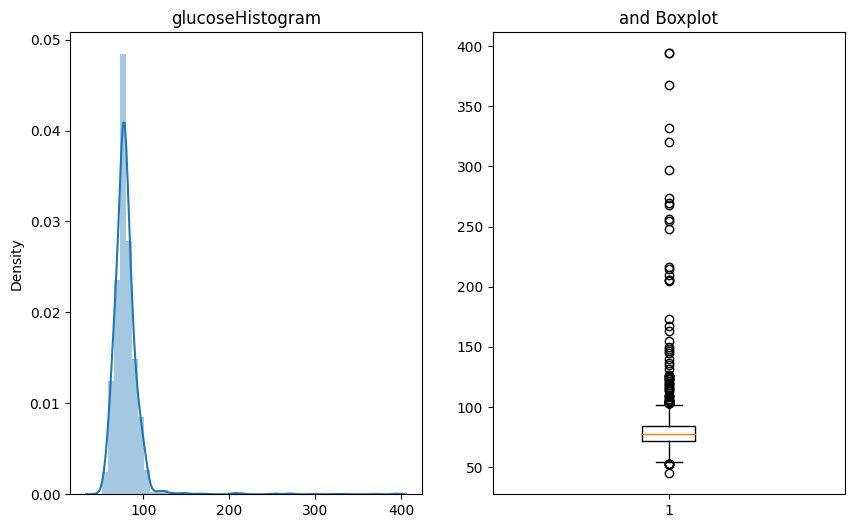

In [ ]:
for col in continuous[1:]:
    plt.subplot(1,2,1)
    sns.distplot(dataset[col])
    label=col+'Histogram'
    plt.title(label)
    plt.xlabel('')

    plt.subplot(1,2,2)
    plt.boxplot(dataset[col])
    plt.title('and Boxplot')
    plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
encoder={'sex':{'M':1,'F':0},'is_smoking':{'YES':1,'NO':0}}
dataset=dataset.replace(encoder)

In [ ]:
print(len(dataset.columns)==len(dataset.describe().columns))

True


In [ ]:
dataset

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,outlier
0,0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1,0
1,1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,0
2,2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,0
3,3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,0
4,4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,0,0,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0,0
3386,3386,46,1.0,0,0,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0,0
3387,3387,44,3.0,1,1,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1,1
3388,3388,60,1.0,1,0,0.0,0.0,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
pd.DataFrame(dataset.groupby('is_smoking')['cigsPerDay'].value_counts())

count
is_smoking cigsPerDay       
0          0.0          1514
1          20.0          563
           30.0          160
           15.0          152
           9.0            95
           5.0            92
           10.0           90
           3.0            69
           40.0           60
           25.0           42
           1.0            42
           43.0           37
           18.0           25
           35.0           16
           2.0            16
           6.0            12
           7.0             8
           8.0             8
           60.0            8
           50.0            6
           4.0             6
           17.0            5
           23.0            5
           11.0            4
           12.0            3
           13.0            3
           45.0            2
           16.0            2
           19.0            2
           38.0            1
           14.0            1
           70.0            1

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
dataset.drop(columns=['id','is_smoking','education','outlier'],inplace=True)

In [ ]:
dataset['bmi']=np.where(dataset['BMI']<17.5,'severely underweight',np.where((dataset['BMI']>=17.5)&(dataset['BMI']<=18.4),'underweight',np.where((dataset['BMI']>=18.5)&(dataset['BMI']<=25),'optimal',np.where((dataset['BMI']>=25.1)&(dataset['BMI']<=30),'overweight',np.where((dataset['BMI']>=30.1)&(dataset['BMI']<=40),'obese','severely obese')))))

In [ ]:
dataset[['BMI','bmi']]

,BMI,bmi
0,25.38,overweight
1,29.77,overweight
2,20.35,optimal
3,28.26,overweight
4,26.42,overweight
...,...,...
3385,29.28,overweight
3386,21.96,optimal
3387,28.92,overweight
3388,23.01,optimal


In [ ]:
bmi_dict={'severely underweight':0,'severely obese':0,'obese':1,'underweight':2,'overweight':2,'optimal':3}
dataset['bmi']=dataset['bmi'].map(bmi_dict)

In [ ]:
dataset

,age,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,bmi
0,64,0,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1,2
1,36,1,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,2
2,46,0,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,3
3,50,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,2
4,64,0,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,0,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0,2
3386,46,0,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0,3
3387,44,1,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1,2
3388,60,1,0.0,0.0,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0,3


In [ ]:
dataset.drop(columns=['BMI'],inplace=True)

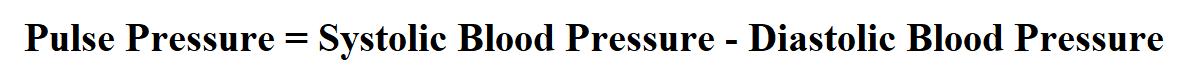

In [ ]:
dataset['Pulse_Pressure']=dataset.apply(lambda x:x['sysBP'] - x['diaBP'],axis=1)

In [ ]:
dataset

,age,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,heartRate,glucose,TenYearCHD,bmi,Pulse_Pressure
0,64,0,3.0,0.0,0,0,0,221.0,148.0,85.0,90.0,80.0,1,2,63.0
1,36,1,0.0,0.0,0,1,0,212.0,168.0,98.0,72.0,75.0,0,2,70.0
2,46,0,10.0,0.0,0,0,0,250.0,116.0,71.0,88.0,94.0,0,3,45.0
3,50,1,20.0,0.0,0,1,0,233.0,158.0,88.0,68.0,94.0,1,2,70.0
4,64,0,30.0,0.0,0,0,0,241.0,136.5,85.0,70.0,77.0,0,2,51.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,0,0.0,0.0,0,0,0,261.0,123.5,79.0,70.0,103.0,0,2,44.5
3386,46,0,0.0,0.0,0,0,0,199.0,102.0,56.0,80.0,84.0,0,3,46.0
3387,44,1,3.0,0.0,0,1,0,352.0,164.0,119.0,73.0,72.0,1,2,45.0
3388,60,1,0.0,0.0,0,1,0,191.0,167.0,105.0,80.0,85.0,0,3,62.0


In [ ]:
dataset.drop(columns=['sysBP','diaBP'],inplace=True)

In [ ]:
dataset

,age,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,heartRate,glucose,TenYearCHD,bmi,Pulse_Pressure
0,64,0,3.0,0.0,0,0,0,221.0,90.0,80.0,1,2,63.0
1,36,1,0.0,0.0,0,1,0,212.0,72.0,75.0,0,2,70.0
2,46,0,10.0,0.0,0,0,0,250.0,88.0,94.0,0,3,45.0
3,50,1,20.0,0.0,0,1,0,233.0,68.0,94.0,1,2,70.0
4,64,0,30.0,0.0,0,0,0,241.0,70.0,77.0,0,2,51.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,0,0.0,0.0,0,0,0,261.0,70.0,103.0,0,2,44.5
3386,46,0,0.0,0.0,0,0,0,199.0,80.0,84.0,0,3,46.0
3387,44,1,3.0,0.0,0,1,0,352.0,73.0,72.0,1,2,45.0
3388,60,1,0.0,0.0,0,1,0,191.0,80.0,85.0,0,3,62.0


#### 2. Feature Selection

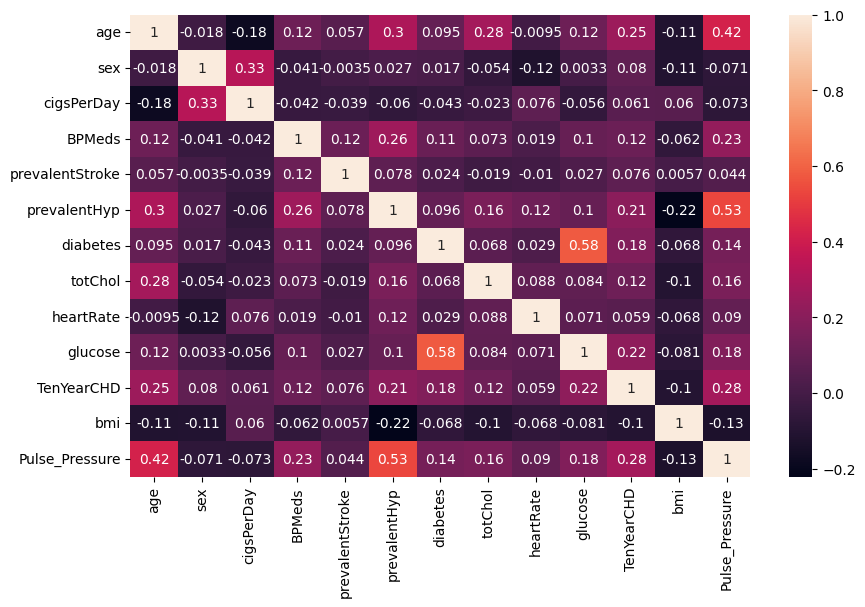

In [ ]:
# Select your features wisely to avoid overfitting
sns.heatmap(dataset.corr(),annot=True)
plt.show()

In [ ]:
def cal_vif(dataset):
    vif=pd.DataFrame()
    vif['features']=dataset.columns
    vif['vif value']=[variance_inflation_factor(dataset.values,col)for col in range(dataset.shape[1])]
    return vif.sort_values(by='vif value',ascending=False).reset_index(drop=True)

In [ ]:
cal_vif(dataset[[col for col in dataset.columns if col != 'TenYearCHD']])

,features,vif value
0,age,40.152836
1,heartRate,34.241625
2,totChol,31.850764
3,glucose,24.334303
4,Pulse_Pressure,21.196104
5,bmi,10.033727
6,prevalentHyp,2.080037
7,sex,2.059757
8,cigsPerDay,1.927750
9,diabetes,1.452926


##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

In [ ]:
# px.box(np.sqrt(dataset[[col for col in dataset.columns if col in continuous]]))

C:\Users\Luv\AppData\Local\Temp\ipykernel_18664\2296669453.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((dataset[col]))


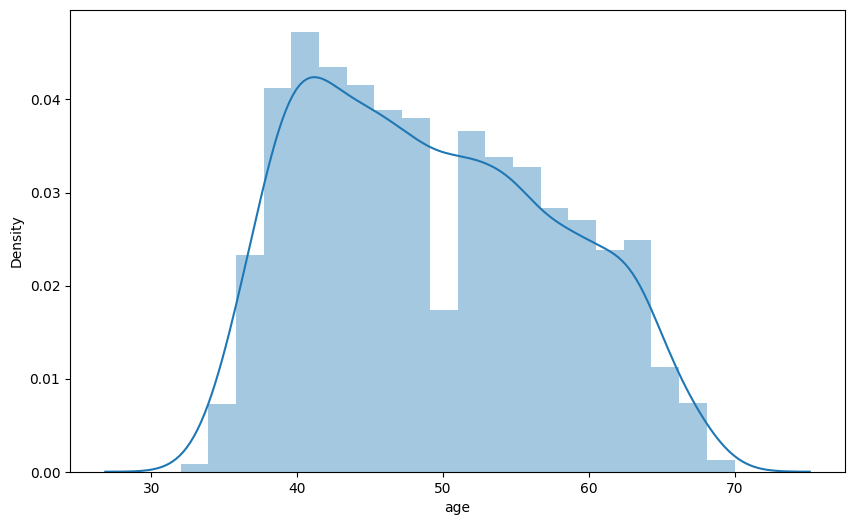

C:\Users\Luv\AppData\Local\Temp\ipykernel_18664\2296669453.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((dataset[col]))


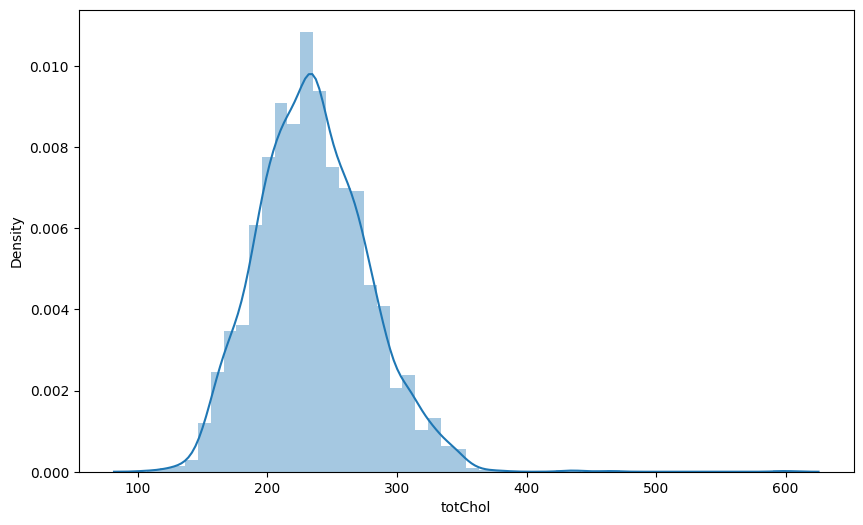

C:\Users\Luv\AppData\Local\Temp\ipykernel_18664\2296669453.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((dataset[col]))


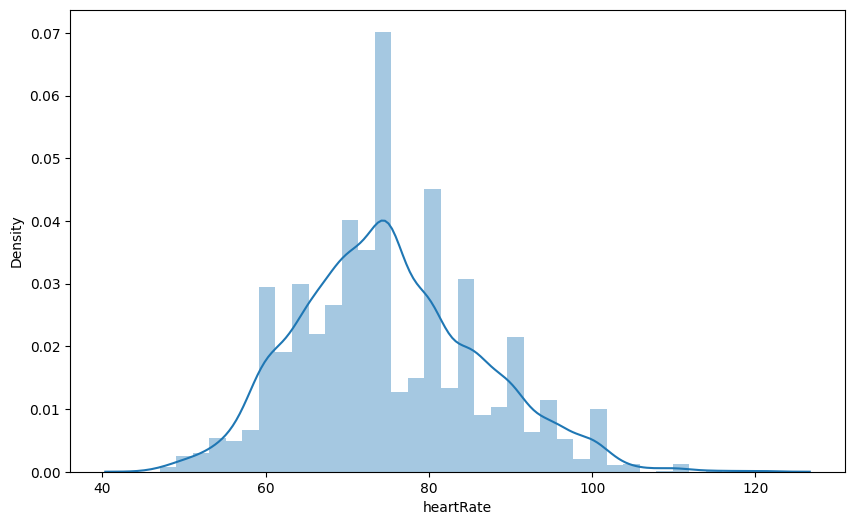

C:\Users\Luv\AppData\Local\Temp\ipykernel_18664\2296669453.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((dataset[col]))


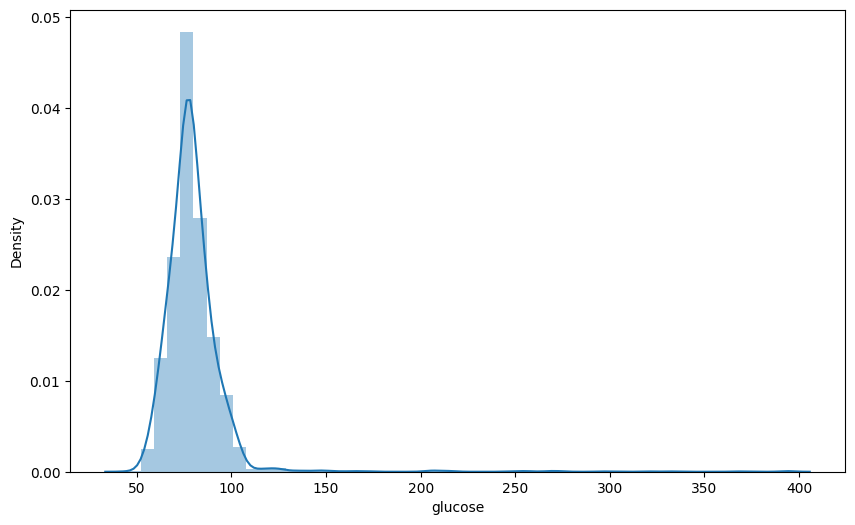

In [ ]:
for col in [col for col in dataset.columns if col in continuous]:
    sns.distplot((dataset[col]))
    plt.show()

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

### 6. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)
tl=TomekLinks()
x_tl,y_tl=tl.fit_resample(dataset[[col for col in dataset.columns if col not in 'TenYearCHD']],dataset['TenYearCHD'])

In [ ]:
dataset['TenYearCHD'].value_counts()

TenYearCHD
0    2539
1     511
Name: count, dtype: int64

In [ ]:
y_tl.value_counts()

TenYearCHD
0    2376
1     511
Name: count, dtype: int64

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

### 7. Data Scaling

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x_tl,y_tl,test_size=0.2,random_state=2510)

In [ ]:
y_test.value_counts()

TenYearCHD
0    466
1    112
Name: count, dtype: int64

In [ ]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

##### Which method have you used to scale you data and why?

### 8. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 9. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
# x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=2510)

##### What data splitting ratio have you used and why? 

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1.Logistic Regression

In [ ]:
# ML Model - 1 Implementation
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)
y_pred=log_reg.predict(x_test)
# Fit the Algorithm

# Predict on the model

In [ ]:
confusion_matrix(y_test,y_pred)

array([[459,   7],
       [ 86,  26]], dtype=int64)

In [ ]:
precision_score(y_test,y_pred)

0.7878787878787878

In [ ]:
recall_score(y_test,y_pred)

0.23214285714285715

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***